In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/DataSet.csv')
print(data.head())

    SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0  83732     1.0     NaN     1.0       1         1        62         3   
1  83733     1.0     NaN     6.0       1         1        53         3   
2  83734     1.0     NaN     NaN       1         1        78         3   
3  83735     2.0     1.0     1.0       2         2        56         3   
4  83736     2.0     1.0     1.0       2         2        42         4   

   DMDCITZN  DMDEDUC2  ...  BPXSY2  BPXDI2  BMXWT  BMXHT  BMXBMI  BMXLEG  \
0       1.0       5.0  ...   124.0    64.0   94.8  184.5    27.8    43.3   
1       2.0       3.0  ...   140.0    88.0   90.4  171.4    30.8    38.0   
2       1.0       3.0  ...   132.0    44.0   83.4  170.1    28.8    35.6   
3       1.0       5.0  ...   134.0    68.0  109.8  160.9    42.4    38.5   
4       1.0       4.0  ...   114.0    54.0   55.2  164.9    20.3    37.4   

   BMXARML  BMXARMC  BMXWAIST  HIQ210  
0     43.6     35.9     101.1     2.0  
1     40.0     33.

In [6]:
print(data.shape)

(5735, 28)


In [7]:
print(data.columns)

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')


In [8]:
new_data = data[['SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI']]

In [9]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB
None


In [10]:
new_data.rename(columns={
    'SEQN': 'seqn',
    'SMQ020': 'smoking',
    'RIAGENDR': 'gender',
    'RIDAGEYR': 'age',
    'DMDEDUC2': 'education',
    'BMXWT': 'weight',
    'BMXHT': 'height',
    'BMXBMI': 'bmi'
}, inplace=True)

/tmp/ipython-input-10-3775199677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.rename(columns={


In [11]:
print(new_data.head)

<bound method NDFrame.head of        seqn  smoking  gender  age  education  weight  height   bmi
0     83732        1       1   62        5.0    94.8   184.5  27.8
1     83733        1       1   53        3.0    90.4   171.4  30.8
2     83734        1       1   78        3.0    83.4   170.1  28.8
3     83735        2       2   56        5.0   109.8   160.9  42.4
4     83736        2       2   42        4.0    55.2   164.9  20.3
...     ...      ...     ...  ...        ...     ...     ...   ...
5730  93695        1       2   76        3.0    59.1   165.8  21.5
5731  93696        2       1   26        5.0   112.1   182.2  33.8
5732  93697        1       2   80        4.0    71.7   152.2  31.0
5733  93700        1       1   35        1.0    78.2   173.3  26.0
5734  93702        2       2   24        5.0    58.3   165.0  21.4

[5735 rows x 8 columns]>


In [12]:
print(new_data.duplicated().sum())

0


In [13]:
new_data.drop(columns='seqn', inplace=True)

/tmp/ipython-input-13-2483629887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop(columns='seqn', inplace=True)


In [14]:
print(new_data.columns)

Index(['smoking', 'gender', 'age', 'education', 'weight', 'height', 'bmi'], dtype='object')


In [15]:
print(new_data.isnull().sum())

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64


In [16]:
new_data['education'].fillna(new_data['education'].median(), inplace=True)
for x in ['weight', 'height', 'bmi']:
    new_data[x].fillna(new_data[x].mean(), inplace=True)

/tmp/ipython-input-16-2688532882.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['education'].fillna(new_data['education'].median(), inplace=True)
/tmp/ipython-input-16-2688532882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['education'].fillna(new_data['education'].median(), inplace=True)
/tmp/ipython-input-16-268

In [17]:
print(new_data.isnull().sum())

smoking      0
gender       0
age          0
education    0
weight       0
height       0
bmi          0
dtype: int64


In [18]:
print(new_data.describe())

           smoking       gender          age    education       weight  \
count  5735.000000  5735.000000  5735.000000  5735.000000  5735.000000   
mean      1.607149     1.518919    48.052310     3.467132    81.342676   
std       0.571975     0.499686    18.431011     1.284826    21.633062   
min       1.000000     1.000000    18.000000     1.000000    32.400000   
25%       1.000000     1.000000    32.000000     3.000000    66.100000   
50%       2.000000     2.000000    48.000000     4.000000    78.400000   
75%       2.000000     2.000000    63.000000     4.000000    92.600000   
max       9.000000     2.000000    80.000000     9.000000   198.900000   

            height          bmi  
count  5735.000000  5735.000000  
mean    166.142834    29.382197  
std      10.024624     7.050607  
min     129.700000    14.500000  
25%     158.750000    24.400000  
50%     166.142834    28.400000  
75%     173.400000    33.000000  
max     202.700000    67.300000  


In [19]:
print(new_data)

      smoking  gender  age  education  weight  height   bmi
0           1       1   62        5.0    94.8   184.5  27.8
1           1       1   53        3.0    90.4   171.4  30.8
2           1       1   78        3.0    83.4   170.1  28.8
3           2       2   56        5.0   109.8   160.9  42.4
4           2       2   42        4.0    55.2   164.9  20.3
...       ...     ...  ...        ...     ...     ...   ...
5730        1       2   76        3.0    59.1   165.8  21.5
5731        2       1   26        5.0   112.1   182.2  33.8
5732        1       2   80        4.0    71.7   152.2  31.0
5733        1       1   35        1.0    78.2   173.3  26.0
5734        2       2   24        5.0    58.3   165.0  21.4

[5735 rows x 7 columns]


In [20]:
columns_to_check = ['age', 'weight', 'height', 'bmi']

for col in columns_to_check:
    Q1 = new_data[col].quantile(0.25)
    Q3 = new_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    new_data = new_data[(new_data[col] >= lower) & (new_data[col] <= upper)]

In [22]:
new_data['smoking'].replace({1: 'yes', 2: 'no', 7: pd.NA, 8: pd.NA}, inplace=True)


/tmp/ipython-input-22-212130439.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['smoking'].replace({1: 'yes', 2: 'no', 7: pd.NA, 8: pd.NA}, inplace=True)


In [23]:
new_data['gender'].replace({1: 'male', 2: 'female'}, inplace=True)

/tmp/ipython-input-23-1789916465.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['gender'].replace({1: 'male', 2: 'female'}, inplace=True)


In [24]:
new_data['education'].replace({
    1: '<9th grade',
    2: '9-11th grade',
    3: 'HS or GED',
    4: 'Some college / AA',
    5: 'College or above',
    7: 'Other',
    8: 'Other'
}, inplace=True)

/tmp/ipython-input-24-2303238118.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['education'].replace({


Data Visualisation

In [37]:
print(new_data.columns)

Index(['smoking', 'gender', 'age', 'education', 'weight', 'height', 'bmi'], dtype='object')


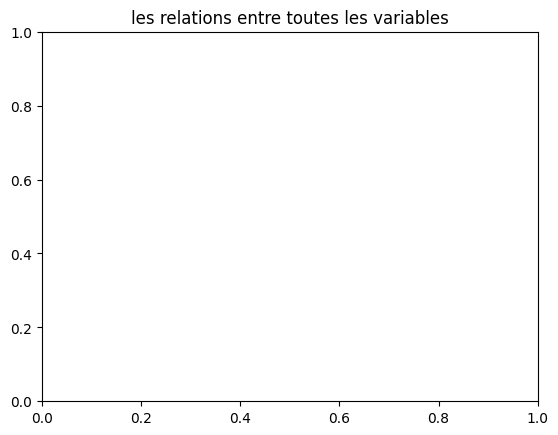

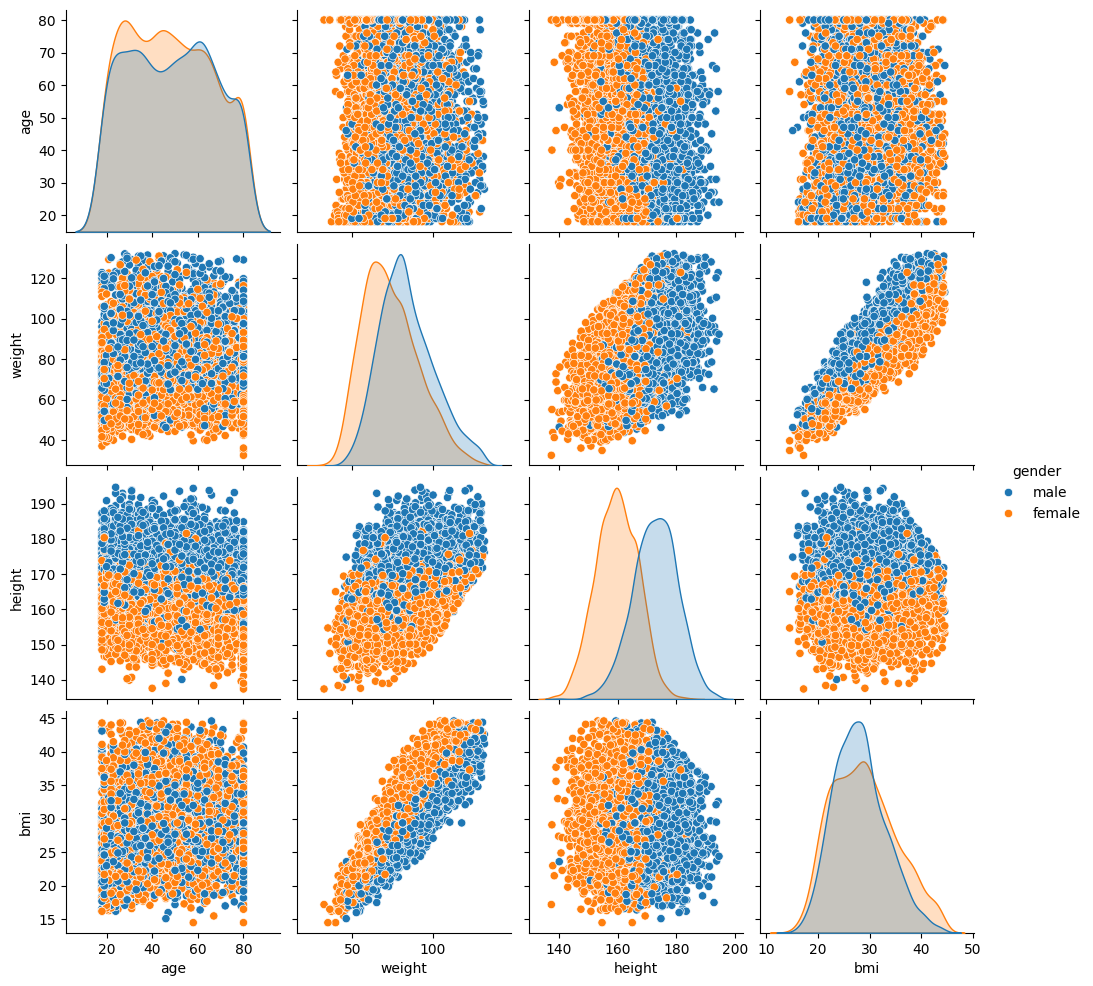

In [27]:
plt.title('les relations entre toutes les variables')
sns.pairplot(new_data, hue='gender')
plt.show()

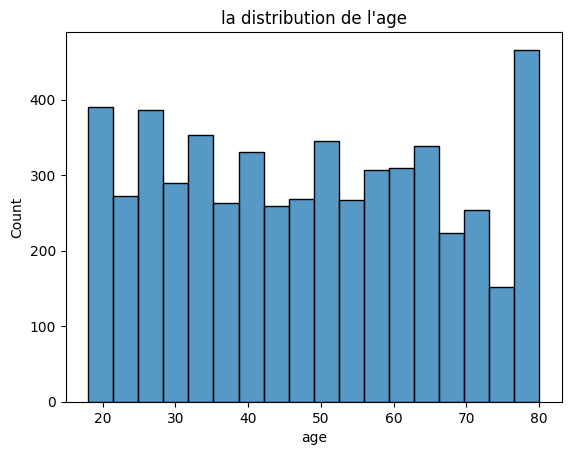

In [29]:
plt.title("la distribution de l'age")
sns.histplot(new_data['age'])
plt.show()

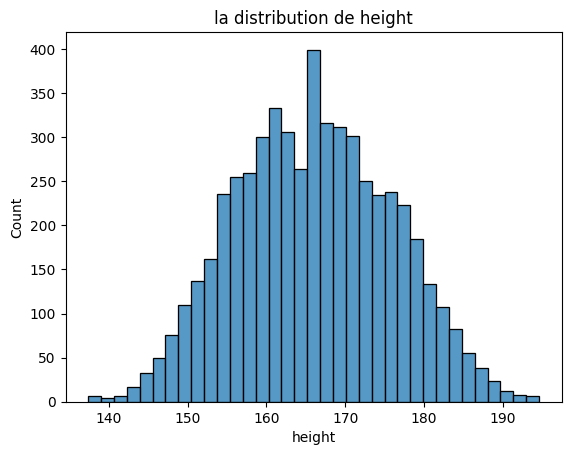

In [30]:
plt.title("la distribution de height")
sns.histplot(new_data['height'])
plt.show()

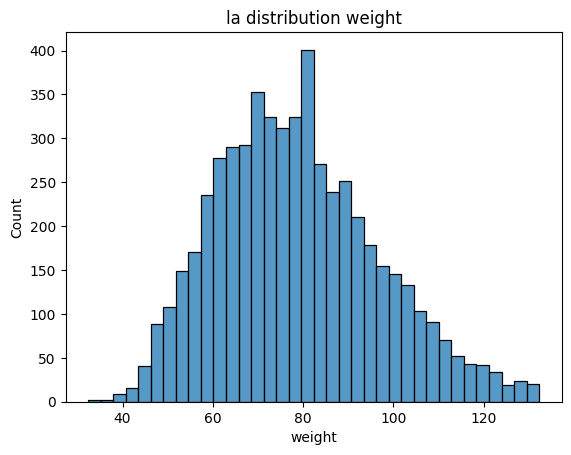

In [31]:
plt.title("la distribution weight")
sns.histplot(new_data['weight'])
plt.show()

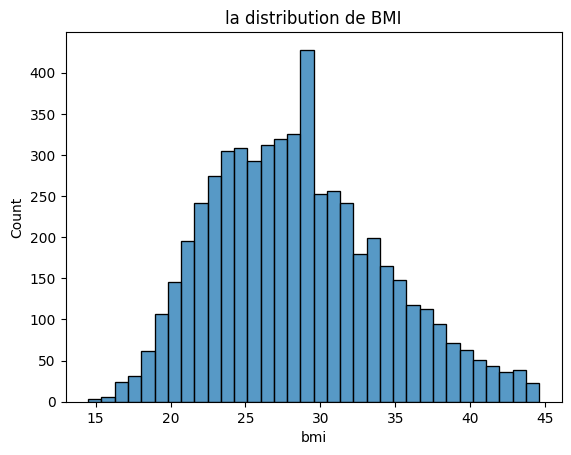

In [32]:
plt.title("la distribution de BMI")
sns.histplot(new_data['bmi'])
plt.show()

<Axes: xlabel='smoking', ylabel='count'>

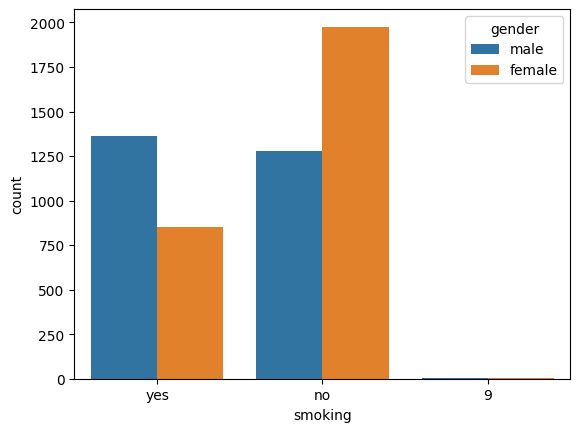

In [47]:
sns.countplot(x='smoking', hue='gender', data=new_data)

In [49]:
new_data.to_csv('/Cleaned_data.csv')